In [86]:
import os
import sys
sys.path.append(os.path.abspath('..'))
import warnings
warnings.filterwarnings("ignore")

In [152]:
from importlib import reload
import scripts.data_load_clean_transform, scripts.analysis
reload(scripts.data_load_clean_transform)
reload(scripts.analysis)    


<module 'scripts.analysis' from 'c:\\ML and DS Files\\Kifiya AI\\Kaim-week-4\\scripts\\analysis.py'>

In [153]:
from scripts.data_load_clean_transform import DataLoader, DataCleaner
from scripts.analysis import CustomerBehaviorAnalysis

# Data Load Clean and Transform

In [87]:
file_path = '../week 4 data/Data/rossmann-store-sales/store.csv'
load_csv = DataLoader(file_path)
store_data = load_csv.load_data()

2025-01-03 10:46:31,020 - INFO - Data successfully loaded from ../week 4 data/Data/rossmann-store-sales/store.csv
2025-01-03 10:46:31,021 - INFO - DataFrame Shape: (1115, 10)


In [92]:
# store data
store_data.head(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [88]:
# load traind data
file_path = '../week 4 data/Data/rossmann-store-sales/train.csv'
load_csv = DataLoader(file_path)
train_data = load_csv.load_data()

2025-01-03 10:46:41,049 - INFO - Data successfully loaded from ../week 4 data/Data/rossmann-store-sales/train.csv
2025-01-03 10:46:41,051 - INFO - DataFrame Shape: (1017209, 9)


In [89]:
# train data
train_data.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1


In [90]:
# load test data
file_path = '../week 4 data/Data/rossmann-store-sales/test.csv'
load_csv = DataLoader(file_path)
test_data = load_csv.load_data()

2025-01-03 10:47:28,647 - INFO - Data successfully loaded from ../week 4 data/Data/rossmann-store-sales/test.csv
2025-01-03 10:47:28,648 - INFO - DataFrame Shape: (41088, 8)


In [91]:
# Test data
test_data.head(2)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0


In [127]:
# check missing values in train
check_missing_train = DataCleaner(train_data)
check_missing_train.check_missing_values()

2025-01-03 11:41:56,075 - INFO - Checking for missing values in the DataFrame.
2025-01-03 11:41:56,175 - INFO - Missing values check completed.


,Column,Missing Values,Missing Percentage,Data Type
0,Store,0,0.0,int64
1,DayOfWeek,0,0.0,int64
2,Date,0,0.0,"datetime64[ns, UTC]"
3,Sales,0,0.0,int64
4,Customers,0,0.0,int64
5,Open,0,0.0,int64
6,Promo,0,0.0,int64
7,StateHoliday,0,0.0,object
8,SchoolHoliday,0,0.0,int64


In [114]:
# convert date to datetime  
check_missing_train.transform_datetime(column='Date', timezone='UTC')

2025-01-03 11:19:20,663 - INFO - Transforming datetime column 'Date' to timezone 'UTC'.
2025-01-03 11:19:20,793 - INFO - Datetime transformation for column 'Date' completed.


In [130]:
# check missing values and convert date in test data
check_missing_test = DataCleaner(test_data)
check_missing_test.transform_datetime(column='Date', timezone='UTC')
check_missing_test.check_missing_values()

2025-01-03 11:45:08,067 - INFO - Transforming datetime column 'Date' to timezone 'UTC'.
2025-01-03 11:45:08,086 - INFO - Datetime transformation for column 'Date' completed.
2025-01-03 11:45:08,087 - INFO - Checking for missing values in the DataFrame.
2025-01-03 11:45:08,096 - INFO - Missing values check completed.


,Column,Missing Values,Missing Percentage,Data Type
0,Id,0,0.0,int64
1,Store,0,0.0,int64
2,DayOfWeek,0,0.0,int64
3,Date,0,0.0,"datetime64[ns, UTC]"
4,Open,0,0.0,float64
5,Promo,0,0.0,int64
6,StateHoliday,0,0.0,object
7,SchoolHoliday,0,0.0,int64


In [118]:
# remove nulls from columns
check_missing_test.remove_nulls_from_columns(columns=['Open'])

2025-01-03 11:22:50,941 - INFO - Removing rows with null values in columns: ['Open'].
2025-01-03 11:22:50,957 - INFO - Rows with null values in columns ['Open'] removed successfully.


In [120]:
store_data.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [121]:
train_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [122]:
test_data.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

In [123]:
# check missing values in store data
check_missing_store = DataCleaner(store_data)
check_missing_store.check_missing_values()

2025-01-03 11:39:04,900 - INFO - Checking for missing values in the DataFrame.
2025-01-03 11:39:04,905 - INFO - Missing values check completed.


,Column,Missing Values,Missing Percentage,Data Type
0,Store,0,0.000000,int64
1,StoreType,0,0.000000,object
2,Assortment,0,0.000000,object
3,CompetitionDistance,3,0.269058,float64
4,CompetitionOpenSinceMonth,354,31.748879,float64
5,CompetitionOpenSinceYear,354,31.748879,float64
6,Promo2,0,0.000000,int64
7,Promo2SinceWeek,544,48.789238,float64
8,Promo2SinceYear,544,48.789238,float64
9,PromoInterval,544,48.789238,object


In [128]:
# delete 3 rows that have missing values in CompetitionDistance only
check_missing_store.remove_nulls_from_columns(columns=['CompetitionDistance'])

2025-01-03 11:43:04,024 - INFO - Removing rows with null values in columns: ['CompetitionDistance'].
2025-01-03 11:43:04,030 - INFO - Rows with null values in columns ['CompetitionDistance'] removed successfully.


In [129]:
# check missing values in store data    
check_missing_store.check_missing_values()

2025-01-03 11:43:16,971 - INFO - Checking for missing values in the DataFrame.
2025-01-03 11:43:16,976 - INFO - Missing values check completed.


,Column,Missing Values,Missing Percentage,Data Type
0,Store,0,0.000000,int64
1,StoreType,0,0.000000,object
2,Assortment,0,0.000000,object
3,CompetitionDistance,0,0.000000,float64
4,CompetitionOpenSinceMonth,351,31.564748,float64
5,CompetitionOpenSinceYear,351,31.564748,float64
6,Promo2,0,0.000000,int64
7,Promo2SinceWeek,542,48.741007,float64
8,Promo2SinceYear,542,48.741007,float64
9,PromoInterval,542,48.741007,object


# Analysis

In [154]:
# create an instance of the CustomerBehaviorAnalysis class
analysis = CustomerBehaviorAnalysis(store_data, train_data, test_data)

2025-01-03 15:02:57,285 - INFO - CustomerBehaviorAnalysis instance created.


2025-01-03 15:03:09,517 - INFO - Executing plot_promo_distribution.
2025-01-03 15:03:09,594 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 15:03:09,604 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 15:03:09,671 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 15:03:09,688 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


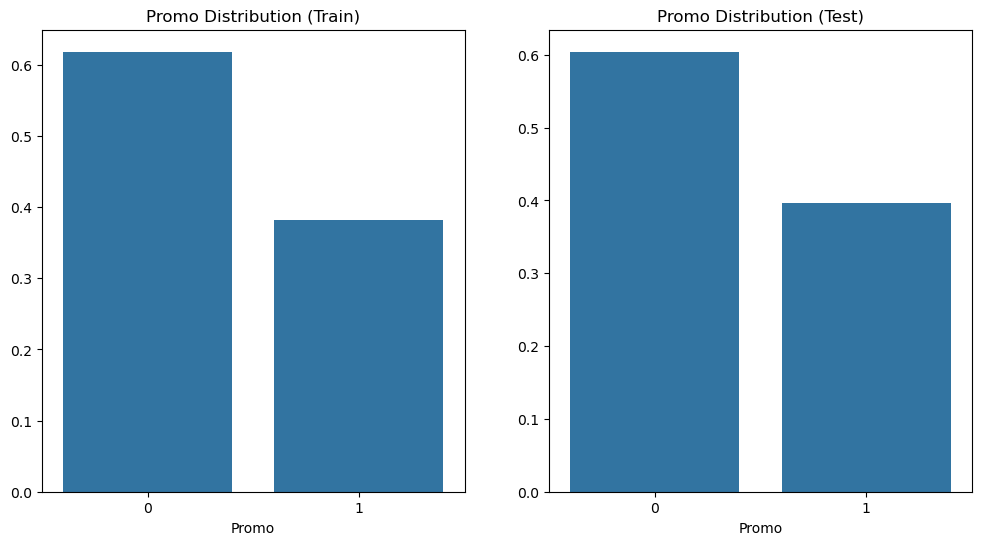

In [156]:
# Check for distribution in both training and test sets
analysis.plot_promo_distribution()

2025-01-03 15:03:17,815 - INFO - Executing sales_during_holidays.


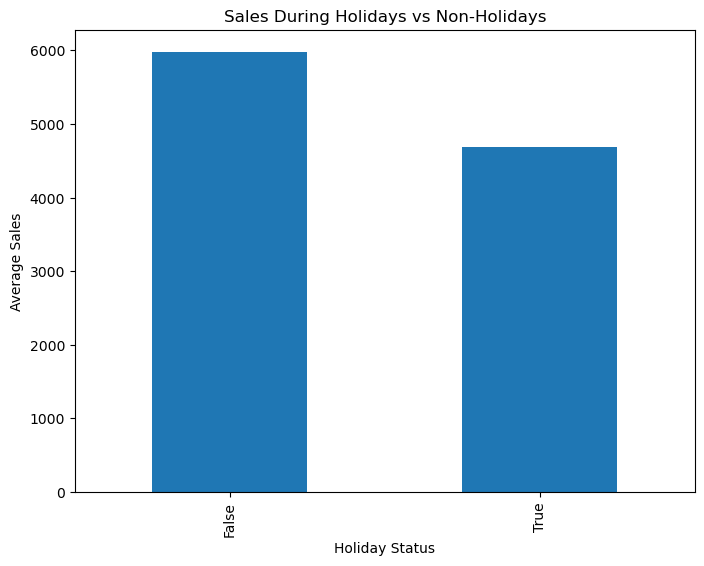

In [157]:
# Check & compare sales behavior before, during and after holidays  
analysis.sales_during_holidays()

2025-01-03 15:03:23,157 - INFO - Executing seasonal_purchase_behavior.


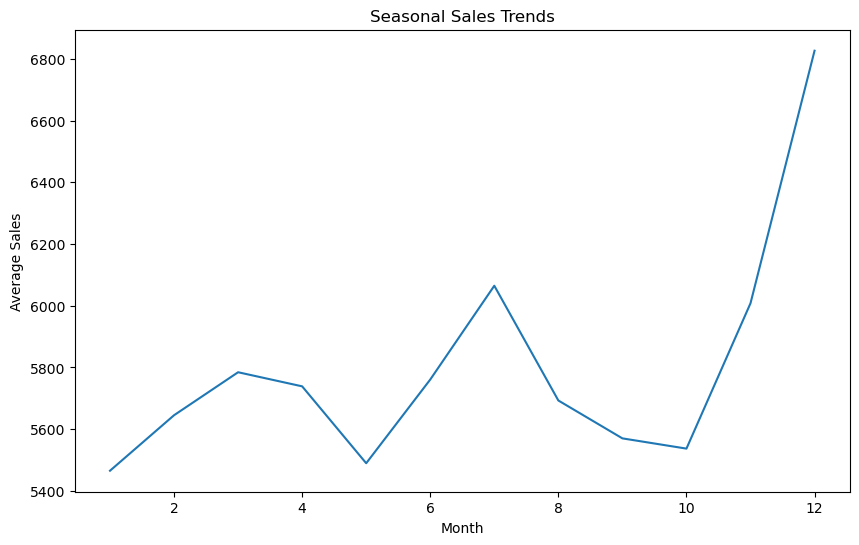

In [158]:
# Find seasonal trends such as Christmas and Easter
analysis.seasonal_purchase_behavior()

2025-01-03 15:03:27,260 - INFO - Executing sales_customer_correlation.


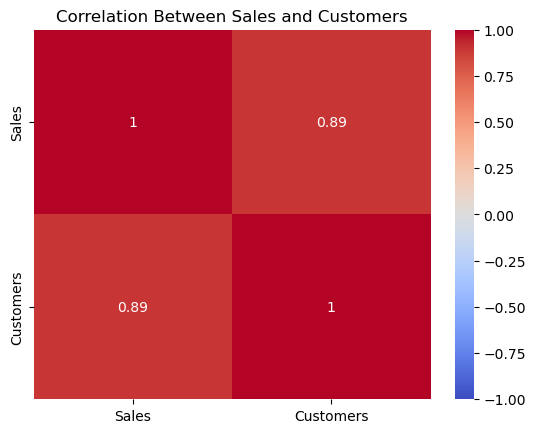

In [159]:
# Find correlation between sales and number of customers.
analysis.sales_customer_correlation()

2025-01-03 15:03:31,134 - INFO - Executing promo_effectiveness.


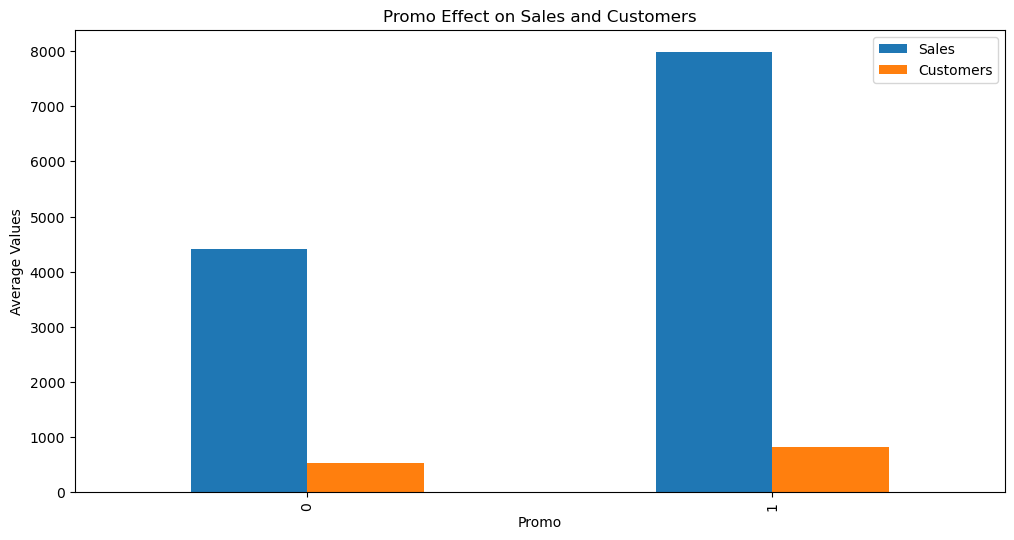

In [160]:
# How do promotions affect sales and customers?
analysis.promo_effectiveness()  

2025-01-03 15:03:34,596 - INFO - Executing store_open_days_analysis.


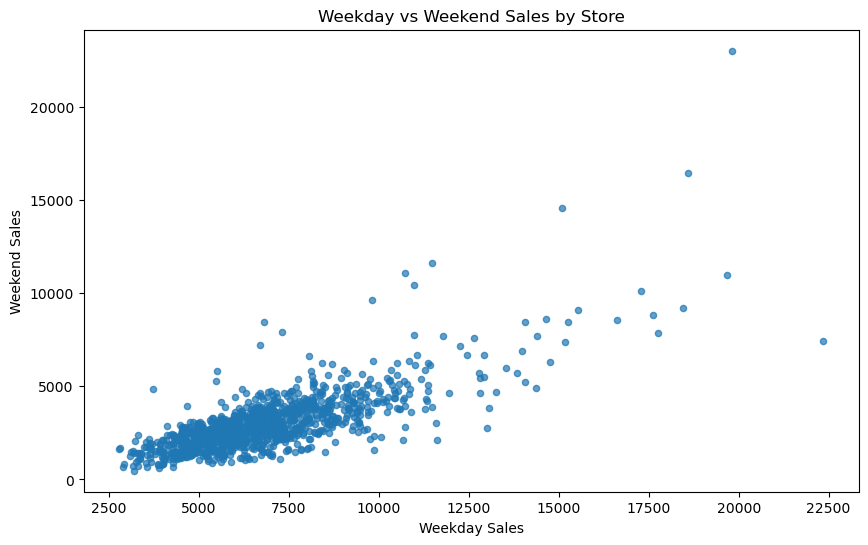

In [161]:
# Analyze sales for stores open on all weekdays vs weekends
analysis.store_open_days_analysis()

2025-01-03 15:03:38,708 - INFO - Executing competitor_distance_effect.


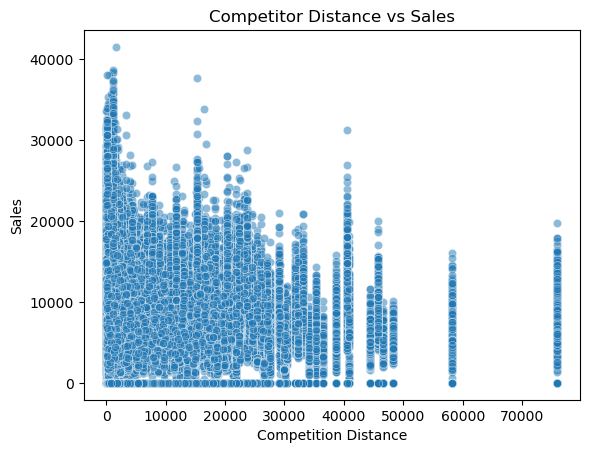

In [162]:
# Analyze the effect of competitor distance on sales
analysis.competitor_distance_effect()

2025-01-03 15:03:48,797 - INFO - Executing competitor_opening_analysis.


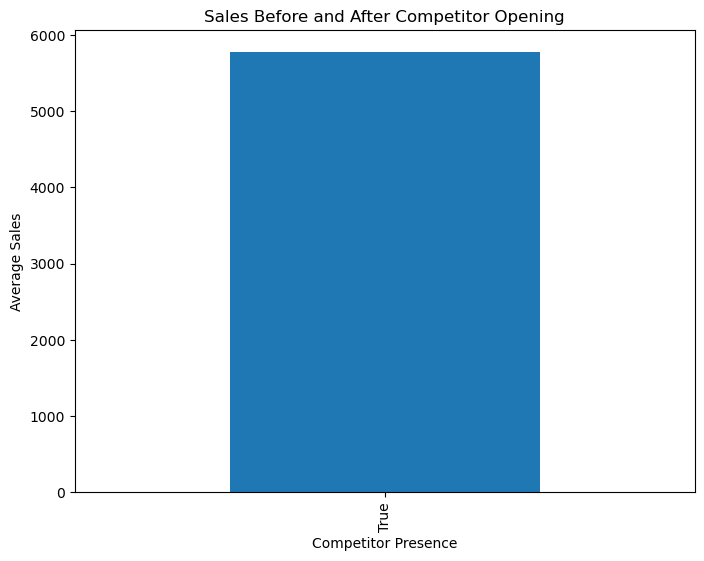

In [163]:
# Analyze the impact of new competitors opening near stores
analysis.competitor_opening_analysis()